$$ \textbf{Задание 4} $$
$$ \textbf{Богданов Александр} $$

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

$\textbf{ Задача (байесовский метод главных компонент).}$ Рассмотрим вероятностную модель метода главных компонент, считая, что для каждого объекта $\mathbf{x}_i \in \mathbb{R}^n$ существует описание $\mathbf{z}_i \in \mathbb{R}^d$ в признаковом пространстве меньшей размерности, причем $\mathbf{x}_i = \mathbf{W} \mathbf{z}_i + \boldsymbol{\mu} + \boldsymbol{\varepsilon}_i$, где $\boldsymbol{\mu} \in \mathbb{R}^n$ - есть некоторое смещение (на случай нецентрированности признаков), а $\boldsymbol{\varepsilon}_i \in \mathbb{R}^n$ - шумовой вектор.\
Пусть имеется выборка $\mathbf{X} = \left[ \mathbf{x}_1, \dots, \mathbf{x}_m \right]^T$ независимых объектов. Пусть
$$ p(\mathbf{z}_i) = N ( \mathbf{z}_i | \mathbf{0}, \mathbf{I}),\ p(\boldsymbol{\varepsilon}_i) = N( \boldsymbol{\varepsilon}_i | \mathbf{0}, \sigma^2 \mathbf{I}). $$

Считать $\mathbf{W}, \sigma^2, \boldsymbol{\mu}$ - неизвестными параметрами задачи, а $d$ фиксированным.

1. Выписать $p (\mathbf{X}, \mathbf{Z} | \mathbf{W}, \boldsymbol{\mu}, \sigma)$. (3 балла)

$\textbf{Решение:}$

$$p (\mathbf{X}, \mathbf{Z} | \mathbf{W}, \boldsymbol{\mu}, \sigma) = p (\mathbf{X} | \mathbf{Z}, \mathbf{W}, \boldsymbol{\mu}, \sigma) p (\mathbf{Z}) = \prod_{i = 1}^m N(\mathbf{x}_i | \boldsymbol{\mu} + \mathbf{W} \mathbf{z}_i, \sigma^2 \mathbf{I}) N(\mathbf{z}_i | \mathbf{0}, \mathbf{I})$$

2. Найти $p(\mathbf{X} | \mathbf{W}, \boldsymbol{\mu}, \sigma)$. (3 балла)

$\textbf{Решение:}$

$$p(\mathbf{X} | \mathbf{W}, \boldsymbol{\mu}, \sigma) = \prod_{i = 1}^m p(\mathbf{x}_i | \mathbf{W}, \boldsymbol{\mu}, \sigma)$$

$$p(\mathbf{x}_i | \mathbf{W}, \boldsymbol{\mu}, \sigma) = \int p(\mathbf{x}_i | \mathbf{z}_i, \mathbf{W}, \boldsymbol{\mu}, \sigma) p( \mathbf{z}_i ) d\mathbf{z}_i$$

Так как $p(\mathbf{x}_i | \mathbf{z}_i, \mathbf{W}, \boldsymbol{\mu}, \sigma)$ и $p( \mathbf{z}_i) d\mathbf{z}_i$ - нормальные распределения, то $p(\mathbf{x}_i | \mathbf{W}, \boldsymbol{\mu}, \sigma)$ - нормальное распределение, причем:

$$p(\mathbf{x}_i | \mathbf{W}, \boldsymbol{\mu}, \sigma) = N(\mathbf{x}_i | \boldsymbol{\mu}, \mathbf{W} \mathbf{W}^T  + \sigma^2 \mathbf{I})$$

$$p(\mathbf{X} | \mathbf{W}, \mu, \sigma) = \prod_{i = 1}^m N(\mathbf{x}_i | \boldsymbol{\mu}, \mathbf{W} \mathbf{W}^T  + \sigma^2 \mathbf{I})$$

3. C помощью EM-алгоритма решить задачу нахождения наиболее правдоподобных оценок $\mathbf{W}, \boldsymbol{\mu}, \sigma$, то есть решить задачу

    $$ p(\mathbf{X} | \mathbf{W}, \boldsymbol{\mu}, \sigma) \rightarrow \max_{\mathbf{W}, \boldsymbol{\mu}, \sigma}, $$
    
    получив итеративные формулы пересчета для E и M шагов. (25 баллов)
    
    Каково апостериорное распределение $p\left( \mathbf{z}_i | \mathbf{x}_i, \mathbf{W}, \sigma, \boldsymbol{\mu} \right)$? (10 баллов) 
    
    Как изменить вероятностную модель, чтобы учесть, что в данных есть пропуски? (10 баллов)

$\textbf{Решение:}$

EM-алгоритм:

$$ F(q, \mathbf{W}, \boldsymbol{\mu}, \sigma) = - \int q(\mathbf{Z}) \log q(\mathbf{Z}) d \mathbf{Z} + \int q(\mathbf{Z}) \log p ( \mathbf{X}, \mathbf{Z} | \mathbf{W}, \boldsymbol{\mu}, \sigma) d \mathbf{Z}  = \log p ( \mathbf{X}, \mathbf{W}, \boldsymbol{\mu}, \sigma) - D_{\text{KL}} (q(\mathbf{w}) \| p (\mathbf{Z} | \mathbf{X}, \mathbf{W}, \boldsymbol{\mu}, \sigma)) \rightarrow \max_{q, \mathbf{W}, \boldsymbol{\mu}, \sigma}$$

- E-шаг: $F(q, \mathbf{W}, \boldsymbol{\mu}, \sigma) \rightarrow \max\limits_q$

    $$ q(\mathbf{Z}) = p (\mathbf{Z} | \mathbf{X}, \mathbf{W}, \boldsymbol{\mu}, \sigma) = \prod_{i = 1}^m p (\mathbf{z}_i | \mathbf{x}_i, \mathbf{W}, \boldsymbol{\mu}, \sigma)$$

    $$ p (\mathbf{z}_i | \mathbf{x}_i, \mathbf{W}, \boldsymbol{\mu}, \sigma) = \frac{p (\mathbf{z}_i, \mathbf{x}_i | \mathbf{W}, \boldsymbol{\mu}, \sigma)}{p (\mathbf{x}_i | \mathbf{W}, \boldsymbol{\mu}, \sigma)} \propto p (\mathbf{x}_i | \mathbf{z}_i, \mathbf{W}, \boldsymbol{\mu}, \sigma) p (\mathbf{z}_i) = Q(\mathbf{z}_i)$$
    
    Тогда:

    $$\mathbf{m}_i = \arg \max_{\mathbf{z}_i}Q(\mathbf{z}_i) = \arg \min_{\mathbf{z}_i}(-\log Q(\mathbf{z}_i))$$

    Или:

    $$\mathbf{m}_i = \arg \min_{\mathbf{z}_i} \left( \frac{1}{2\sigma^2} (\mathbf{x}_i - \mathbf{W} \mathbf{z}_i - \boldsymbol{\mu})^T (\mathbf{x}_i - \mathbf{W} \mathbf{z}_i - \boldsymbol{\mu}) + \frac{1}{2} \mathbf{z}_i^T \mathbf{z}_i \right)$$

    Так как функция под $\arg \min$ является сильно выпуклой, то решение единственно. Его можно найти явно, так как задача квадратичная.

    Воспользуемся аппроксимацией Лапласа (в данном случае она точная, так как задача квадратичная):

    $$\log Q(\mathbf{z}_i) = \log Q(\mathbf{m}_i) + \frac{1}{2} (\mathbf{z}_i - \mathbf{m}_i)^T \nabla \nabla \log Q(\mathbf{m}_i)(\mathbf{z}_i - \mathbf{m}_i)$$

    Обозначим $\mathbf{A}^{-1} = -\nabla \nabla \log Q(\mathbf{m}_i)$. 

    Получим:

    $$Q(\mathbf{z}_i) = Q(\mathbf{m}_i) \exp \left( - \frac{1}{2} (\mathbf{z}_i - \mathbf{m}_i)^T \mathbf{A}^{-1} (\mathbf{z}_i - \mathbf{m}_i) \right)$$

    Тогда $p (\mathbf{z}_i | \mathbf{x}_i, \mathbf{W}, \boldsymbol{\mu}, \sigma) = N(\mathbf{m}_i, \mathbf{A})$

    Посчитаем $\mathbf{m}_i$:
    
    $$\nabla \log Q(\mathbf{m}_i) = \frac{1}{\sigma^2} \mathbf{W}^T (\mathbf{x}_i - \mathbf{W} \mathbf{z}_i - \boldsymbol{\mu}) - \mathbf{z}_i \Rightarrow \mathbf{m}_i = \frac{1}{\sigma^2} \left( \frac{1}{\sigma^2} \mathbf{W}^T \mathbf{W} + \mathbf{I} \right)^{-1} \mathbf{W}^T (\mathbf{x}_i - \boldsymbol{\mu})$$

    Посчитаем $\mathbf{A}$:

    $$\mathbf{A}^{-1} = \frac{1}{\sigma^2} \mathbf{W}^T \mathbf{W} + \mathbf{I} \Rightarrow \mathbf{A} = \left( \frac{1}{\sigma^2} \mathbf{W}^T \mathbf{W} + \mathbf{I} \right)^{-1}$$
    
    Тогда: 
    
    $$q(\mathbf{Z}) = \prod_{i = 1}^{m} N\left( \mathbf{z}_i | \mathbf{m}_i, \mathbf{A} \right)$$
    
- M-шаг: $$ \mathbb{E}_{q(\mathbf{w})} p ( \mathbf{X}, \mathbf{Z} | \mathbf{W}, \boldsymbol{\mu}, \sigma) = \int q(\mathbf{Z}) p (\mathbf{X}, \mathbf{Z} | \mathbf{W}, \boldsymbol{\mu}, \sigma) d\mathbf{Z} \rightarrow \max_{\mathbf{W}, \boldsymbol{\mu}, \sigma}$$
    
    $$ \tilde{F} (\mathbf{W}, \boldsymbol{\mu}, \sigma) = \mathbb{E}_{q(\mathbf{w})} \log p (\mathbf{X}, \mathbf{Z} | \mathbf{W}, \boldsymbol{\mu}, \sigma) \propto - \frac{mn}{2} \log{\sigma^2} - \frac{1}{2\sigma^2} \sum\limits_{i = 1}^{m} \mathbb{E}_{q(\mathbf{Z})} \left[ ( \mathbf{x}_i - \mathbf{W} \mathbf{z}_i - \boldsymbol{\mu})^T (\mathbf{x}_i - \mathbf{W} \mathbf{z}_i - \boldsymbol{\mu}) \right] \rightarrow \max_{\mathbf{W}, \boldsymbol{\mu}, \sigma}$$
    
    $$ \frac{\partial \tilde{F}}{\partial \mathbf{W}} = 0 \Leftrightarrow \frac{1}{\sigma^2} \sum\limits_{i = 1}^{m} \mathbb{E}_{q(\mathbf{Z})} \left[(\mathbf{x}_i - \boldsymbol{\mu}) \mathbf{z}_i^T - \mathbf{W} \mathbf{z}_i \mathbf{z}_i^T \right] = \boldsymbol{0} \Rightarrow \mathbf{W}^{t + 1} = \left( \sum\limits_{i = 1}^{m} \left( \mathbf{x}_i - \boldsymbol{\mu}^{t + 1} \right) \mathbb{E}_{q^t(\mathbf{Z})} \left[ \mathbf{z}_i^T \right] \right) \left( \sum\limits_{i = 1}^{m} \mathbb{E}_{q^t(\mathbf{Z})} \left[ \mathbf{z}_i \mathbf{z}_i^T \right] \right)^{-1},$$
    
    где $\mathbb{E}_{q^t(\mathbf{Z})} \left[ \mathbf{z}_i^T \right] = \left( \mathbf{m}_i^{T} \right)^{t}$, $\mathbb{E}_{q^t(\mathbf{Z})} \left[ \mathbf{z}_i \mathbf{z}_i^T \right] = \mathbf{A} + \mathbf{m}_i^{t} \left( \mathbf{m}_i^{T} \right)^{t}$.
    
    $$ \frac{\partial \tilde{F}}{\partial \boldsymbol{\mu}} = 0 \Leftrightarrow \frac{1}{\sigma^2} \sum\limits_{i = 1}^{m} \mathbb{E}_{q(\mathbf{Z})} \left[ \mathbf{x}_i - \mathbf{W} \mathbf{z}_i - \boldsymbol{\mu} \right] = \mathbf{0} \Rightarrow \boldsymbol{\mu}^{t + 1} = \frac{1}{m} \sum\limits_{i = 1}^{m} (\mathbf{x}_i - \mathbf{W} \mathbb{E}_{q^t(\mathbf{Z})} \left[ \mathbf{z}_i \right]),$$

    где $\mathbb{E}_{q^t(\mathbf{Z})} \left[ \mathbf{z}_i \right] = \mathbf{m}_i^{t}$.
    
    $$ \frac{\partial \tilde{F}}{\partial \sigma^2} = 0 \Leftrightarrow -\frac{mn}{2 \sigma^2} + \frac{1}{2 \sigma^4} \sum\limits_{i = 1}^{m} \mathbb{E}_{q(\mathbf{Z})} \left[ (\mathbf{x}_i - \mathbf{W} \mathbf{z}_i - \boldsymbol{\mu})^T (\mathbf{x}_i - \mathbf{W} \mathbf{z}_i - \boldsymbol{\mu}) \right] = 0 \Rightarrow$$
    
    $$\Rightarrow \left( \sigma^2 \right)^{t + 1} = \frac{1}{m n} \sum\limits_{i = 1}^{m} \mathbb{E}_{q^t(\mathbf{Z})} \left[ \mathbf{z}_i^T \left( \mathbf{W}^T \right)^{t + 1} \mathbf{W}^{t + 1} \mathbf{z}_i \right] - 2 \mathbb{E}_{q^t(\mathbf{Z})} \left[ \mathbf{z}_i^T \right] \left( \mathbf{W}^T \right)^{t + 1} \left( \mathbf{x}_i - \boldsymbol{\mu}^{t + 1} \right) + \left( \mathbf{x}_i - \boldsymbol{\mu}^{t + 1} \right)^T \left( \mathbf{x}_i - \boldsymbol{\mu}^{t + 1} \right),$$

    где $\mathbb{E}_{q^t(\mathbf{Z})} \left[ \mathbf{z}_i^T \right] = \left( \mathbf{m}_i^{T} \right)^{t}$, $\mathbb{E}_{q^t(\mathbf{Z})} \left[ \mathbf{z}_i^T \left( \mathbf{W}^T \right)^{t + 1} \mathbf{W}^{t + 1} \mathbf{z}_i \right] = \mathrm{tr} \left( \left( \mathbf{W}^T \right)^{t + 1} \mathbf{W}^{t + 1} \mathbf{A} \right) + \left( \mathbf{m}_i^{T} \right)^{t} \left( \mathbf{W}^T \right)^{t + 1} \mathbf{W}^{t + 1} \mathbf{m}_i^{t}.$

4. Сгенерировать признаковую матрицу $\mathbf{X} \in \mathbb{R}^{m \times n}, m = 1000, n = 10$ для $d = 2$ путем генерации $\mathbf{Z} \in \mathbb{R}^{m \times d}$ поэлементно независимо из $N(0, 1)$ и выполнения преобразования $\mathbf{X} = \mathbf{Z} \mathbf{W}^T + \boldsymbol{\varepsilon}$ для $\boldsymbol{\varepsilon} \sim N \left( \boldsymbol{\varepsilon} | \mathbf{0}, \mathbf{I} \right)$, где $\mathbf{W} \in \mathbb{R}^{n \times d}$ матрица преобразования, выбранная Вами. Сравнить результат работы алгоритма из п. 3 с обычным методом главных компонент для $d = 2$ (10 баллов)

$\textbf{Решение:}$

In [107]:
class EM_PCA:
    def __init__(self, n_components):
        self.d = n_components
        
    def E_step(self):
        self.A = np.linalg.inv(1 / self.sigma2 * self.W.T @ self.W + np.identity(self.d))
        self.ms = np.array([1 / self.sigma2 * self.A @ self.W.T @ (self.X[i] - self.mu) for i in range(self.m)])
                      
    def M_step(self):
        self.mu = 1 / self.m * np.sum([self.X[i] - self.W @ self.ms[i] for i in range(self.m)], axis=0)
        self.W = np.sum([np.outer(self.X[i] - self.mu, self.ms[i]) for i in range(self.m)], axis=0) @\
                 np.linalg.inv(np.sum([self.A + np.outer(self.ms[i], self.ms[i]) for i in range(self.m)], axis=0))
        self.sigma2 = 1 / (self.m * self.n) * np.sum([np.trace(self.W.T @ self.W @ self.A) +\
                                                      self.ms[i].T @ self.W.T @ self.W @ self.ms[i] -\
                                                      2 * self.ms[i].T @ self.W.T @ (self.X[i] - self.mu) +\
                                                      (self.X[i] - self.mu).T @ (self.X[i] - self.mu)\
                                                      for i in range(self.m)])
        
    def fit(self, X):
        
        self.X = X
        self.m = X.shape[0]
        self.n = X.shape[1]
        
        self.W = np.random.randn(self.n, self.d)
        self.mu = X.mean(axis=0)
        self.sigma2 = 1
        
        self.A = None
        self.ms = None
        
    def transform(self, X, iteration=100):
        
        for _ in range(iteration):
            self.E_step()
            self.M_step()
            
        Z = [] 
        for i in range(self.m):
            posterior_i = stats.multivariate_normal(self.ms[i], self.A)
            Z.append(posterior_i.rvs(size=1))
            
        return np.array(Z)
            
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [108]:
m = 1000
n = 10
d = 2

В качестве матрицы преобразования $\mathbf{W}$ будем использовать матрицу с ортогональными столбцами.

In [109]:
Z = stats.multivariate_normal(np.zeros(d), np.identity(d)).rvs(size=m)

A = np.random.rand(n, d)
W, _ = np.linalg.qr(A)

eps = np.random.randn(m, n)

X = Z @ W.T + eps

In [110]:
em_pca = EM_PCA(n_components=d)
Z_em_pca = em_pca.fit_transform(X)

pca = PCA(n_components=d)
Z_pca = pca.fit_transform(X)

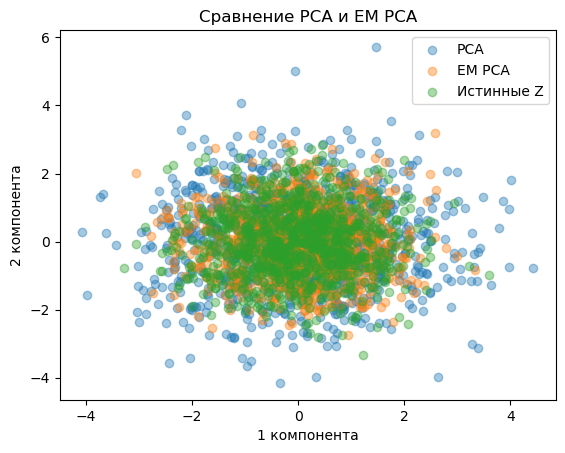

In [111]:
plt.scatter(Z_pca[:, 0], Z_pca[:, 1], alpha=0.4, label="PCA")
plt.scatter(Z_em_pca[:, 0], Z_em_pca[:, 1], alpha=0.4, label="EM PCA")
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.4, label="Истинные Z")
plt.title("Сравнение PCA и EM PCA")
plt.xlabel("1 компонента")
plt.ylabel("2 компонента")
plt.legend()
plt.show()

Как мы видим, PCA, который использует EM-алгоритм, работает лучше, чем PCA из sklearn.

5. (автоматическое определение числа компонент) Считаем, что $d = n$. Введем априорное распределение на $\mathbf{W} = \left[ \mathbf{w}_1, \dots, \mathbf{w}_n \right]$ вида

    $$p (\mathbf{W} | \boldsymbol{\alpha}) = \prod_{j = 1}^{n} \left( \sqrt{\frac{\alpha_j}{2\pi}} \right)^n \exp \left( -\frac{\alpha_j}{2} \mathbf{w}_j^T \mathbf{w}_j \right),$$
    
    где $\mathbf{w}_j$ - столбцы матрицы $\mathbf{W}$.
    
    Если $\alpha_j \rightarrow \infty$, то $\mathbf{w}_j^T \mathbf{w}_j \rightarrow 0$, то есть происходит исключение соответствующей компоненты из разложения $\mathbf{x}_i = \mathbf{W} \mathbf{z}_i + \boldsymbol{\mu} + \boldsymbol{\varepsilon}_i$, что соответствует сокращению числа главных компонент.
    
    С помощью вариационного EM-алгоритма решить задачу (50 баллов)
    
    $$p (\mathbf{X} | \boldsymbol{\mu}, \sigma, \boldsymbol{\alpha}) \rightarrow \max_{\boldsymbol{\mu}, \sigma, \boldsymbol{\alpha}}.$$
    
    **Подсказка:** в качестве скрытых переменных рассмотреть $(\mathbf{Z}, \mathbf{W})$, и на E-шаге использовать вариационное приближение $p (\mathbf{Z}, \mathbf{W} | \mathbf{X}, \boldsymbol{\mu}, \sigma, \boldsymbol{\alpha}) \approx q(\mathbf{Z}) q(\mathbf{W})$.

$\textbf{Решение:}$

6. Для матрицы признаков из пункта 4 воспользоваться результатом пункта 5 и проверить, происходит ли исключение восьми лишних главных компонент в ходе максимизации обоснованности (20 баллов).

$\textbf{Решение:}$